In [1]:
import pandas as pd
import numpy as np
#Loading the dataset
data = pd.read_csv('heart.csv')

In [2]:

print(data.info())
# Missing values elimination
data = data.dropna()
# Drop all duplicate rows
data = data.drop_duplicates()
print(data.info())
data.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


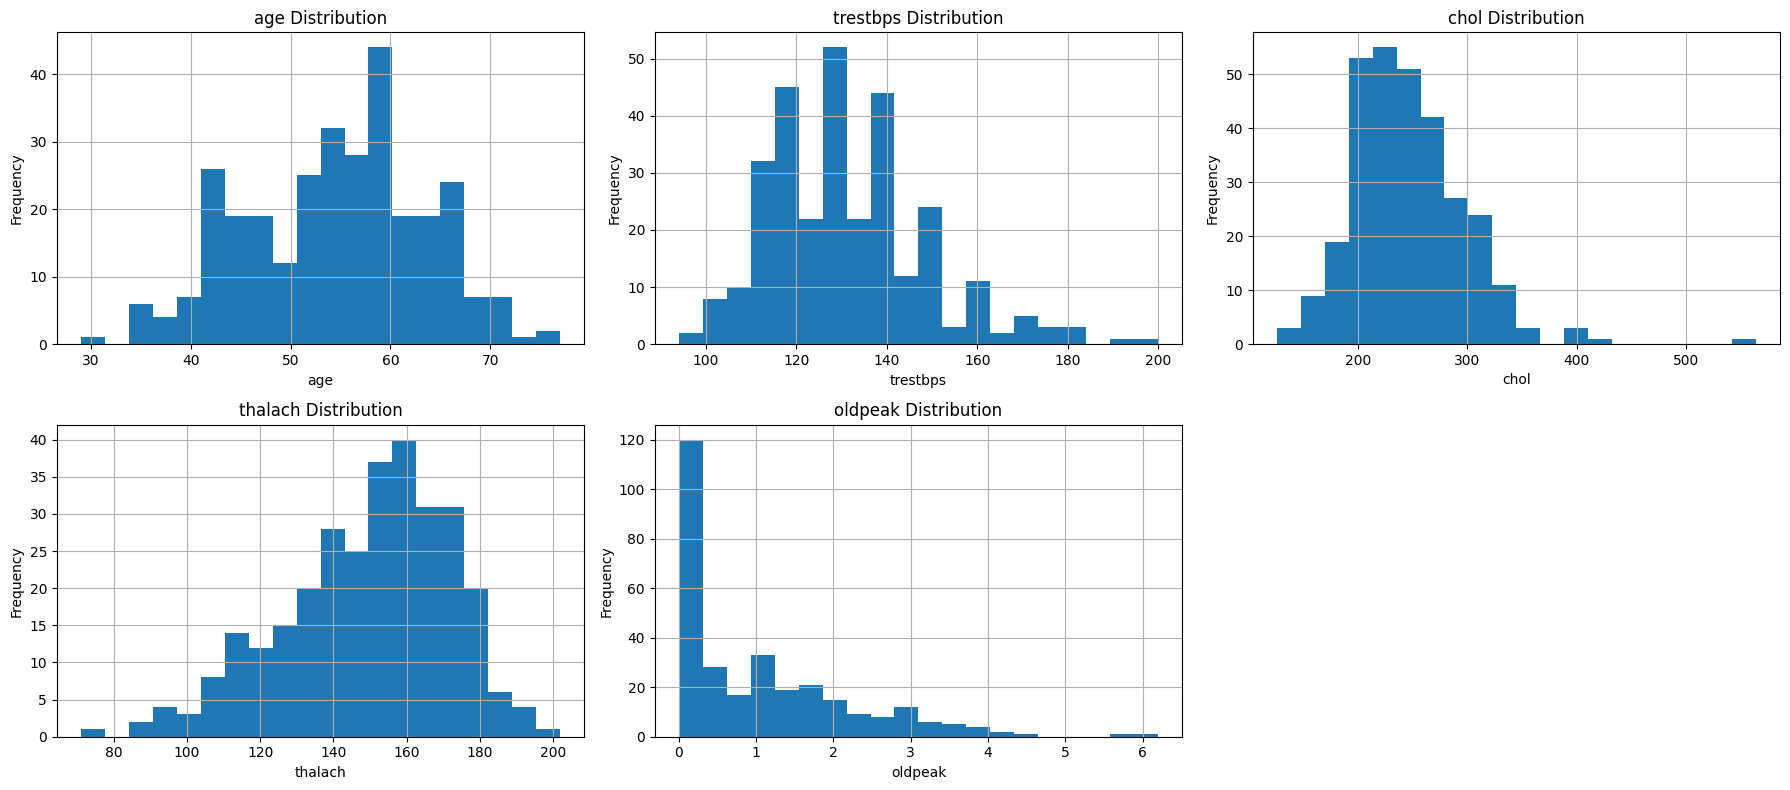

In [3]:
# Histograms of only continuous numeric variables
import matplotlib.pyplot as plt

# Identify numeric columns
numeric_cols = data.select_dtypes(include='number').columns

# Keep only continuous variables (more than 10 unique values)
continuous_cols = [col for col in numeric_cols if data[col].nunique() > 10]



n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    data[col].hist(ax=axes[i], bins=20)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

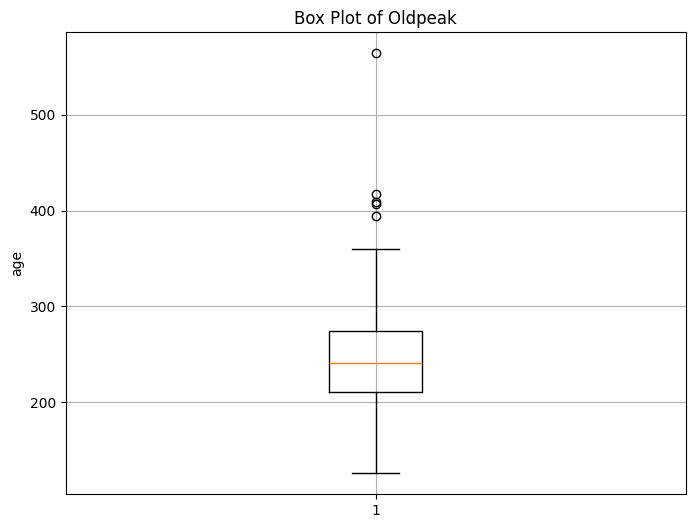

In [4]:
#  Box plot of oldpeak
plt.figure(figsize=(8, 6))
plt.boxplot(data['chol'], vert=True)
plt.title('Box Plot of Oldpeak')
plt.ylabel('age')
plt.grid()
plt.show()  

Column: age, KS Statistic: 0.039735099337748346, P-value: 0.9968914780114527


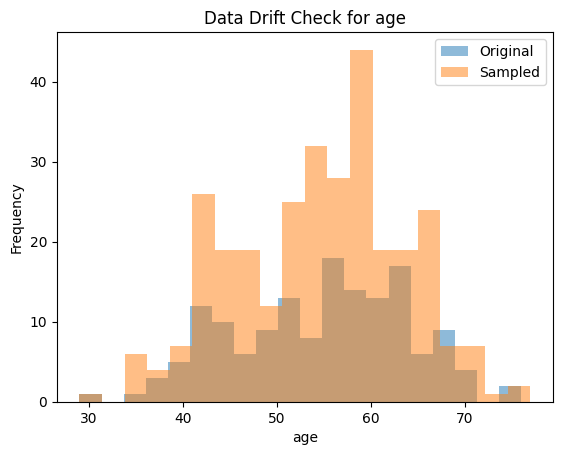

Column: trestbps, KS Statistic: 0.029801324503311258, P-value: 0.9999881501203354


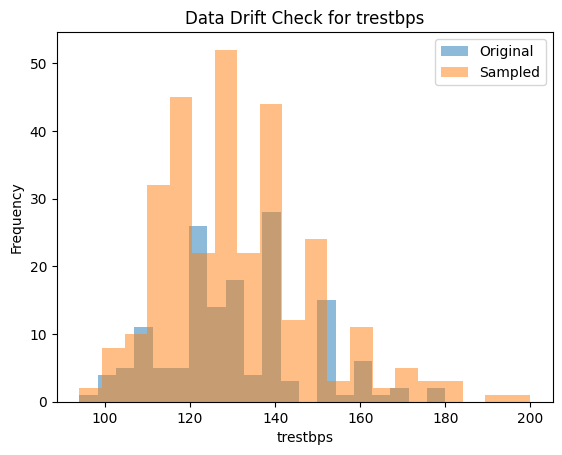

Column: chol, KS Statistic: 0.059602649006622516, P-value: 0.8608046756980353


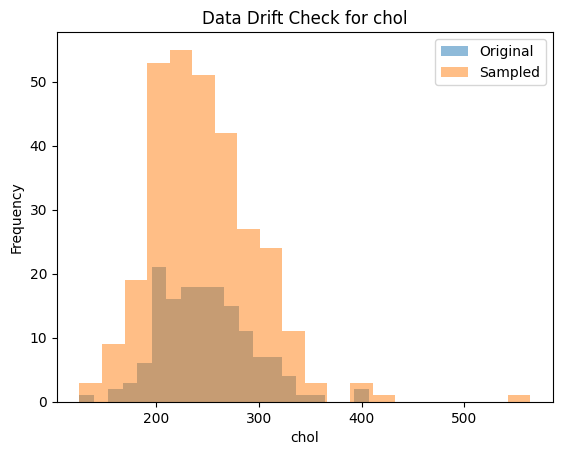

Column: thalach, KS Statistic: 0.029801324503311258, P-value: 0.9999881501203354


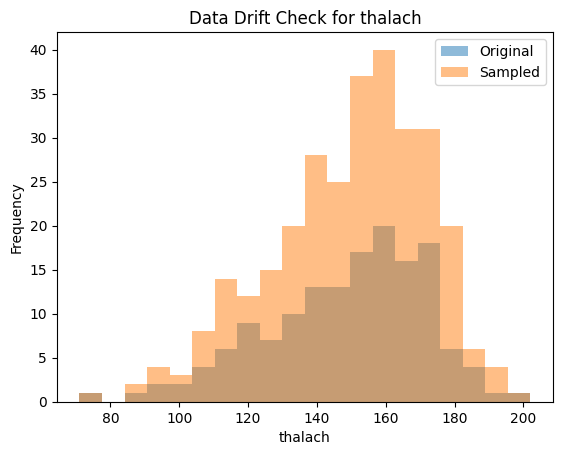

Column: oldpeak, KS Statistic: 0.04304635761589404, P-value: 0.991226934046626


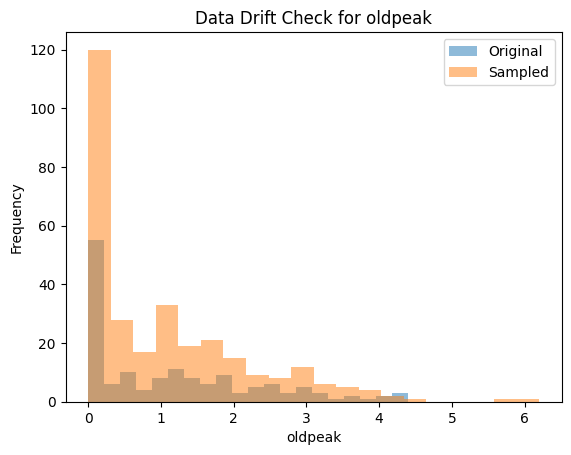

           P-value  Drift Detected
age       0.996891           False
trestbps  0.999988           False
chol      0.860805           False
thalach   0.999988           False
oldpeak   0.991227           False


In [5]:
#Identify data drift amongst numeric variables continuous variables
from scipy.stats import ks_2samp
drift_results = {}
for col in continuous_cols:
    stat, p_value = ks_2samp(data[col], data[col].sample(frac=0.5, random_state=42))
    drift_results[col] = p_value
    print(f'Column: {col}, KS Statistic: {stat}, P-value: {p_value}')
    check = data[col].sample(frac=0.5, random_state=42)
    plt.hist(check, bins=20, alpha=0.5, label='Original')
    plt.hist(data[col], bins=20, alpha=0.5, label='Sampled')
    plt.title(f'Data Drift Check for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
# A low p-value (typically < 0.05) indicates a significant difference between the two distributions, suggesting data drift. 
# A high p-value suggests that the distributions are similar, indicating no significant data drift.
# table summary of variables 
drift_summary = pd.DataFrame.from_dict(drift_results, orient='index', columns=['P-value'])
drift_summary['Drift Detected'] = drift_summary['P-value'] < 0 
print(drift_summary)
    

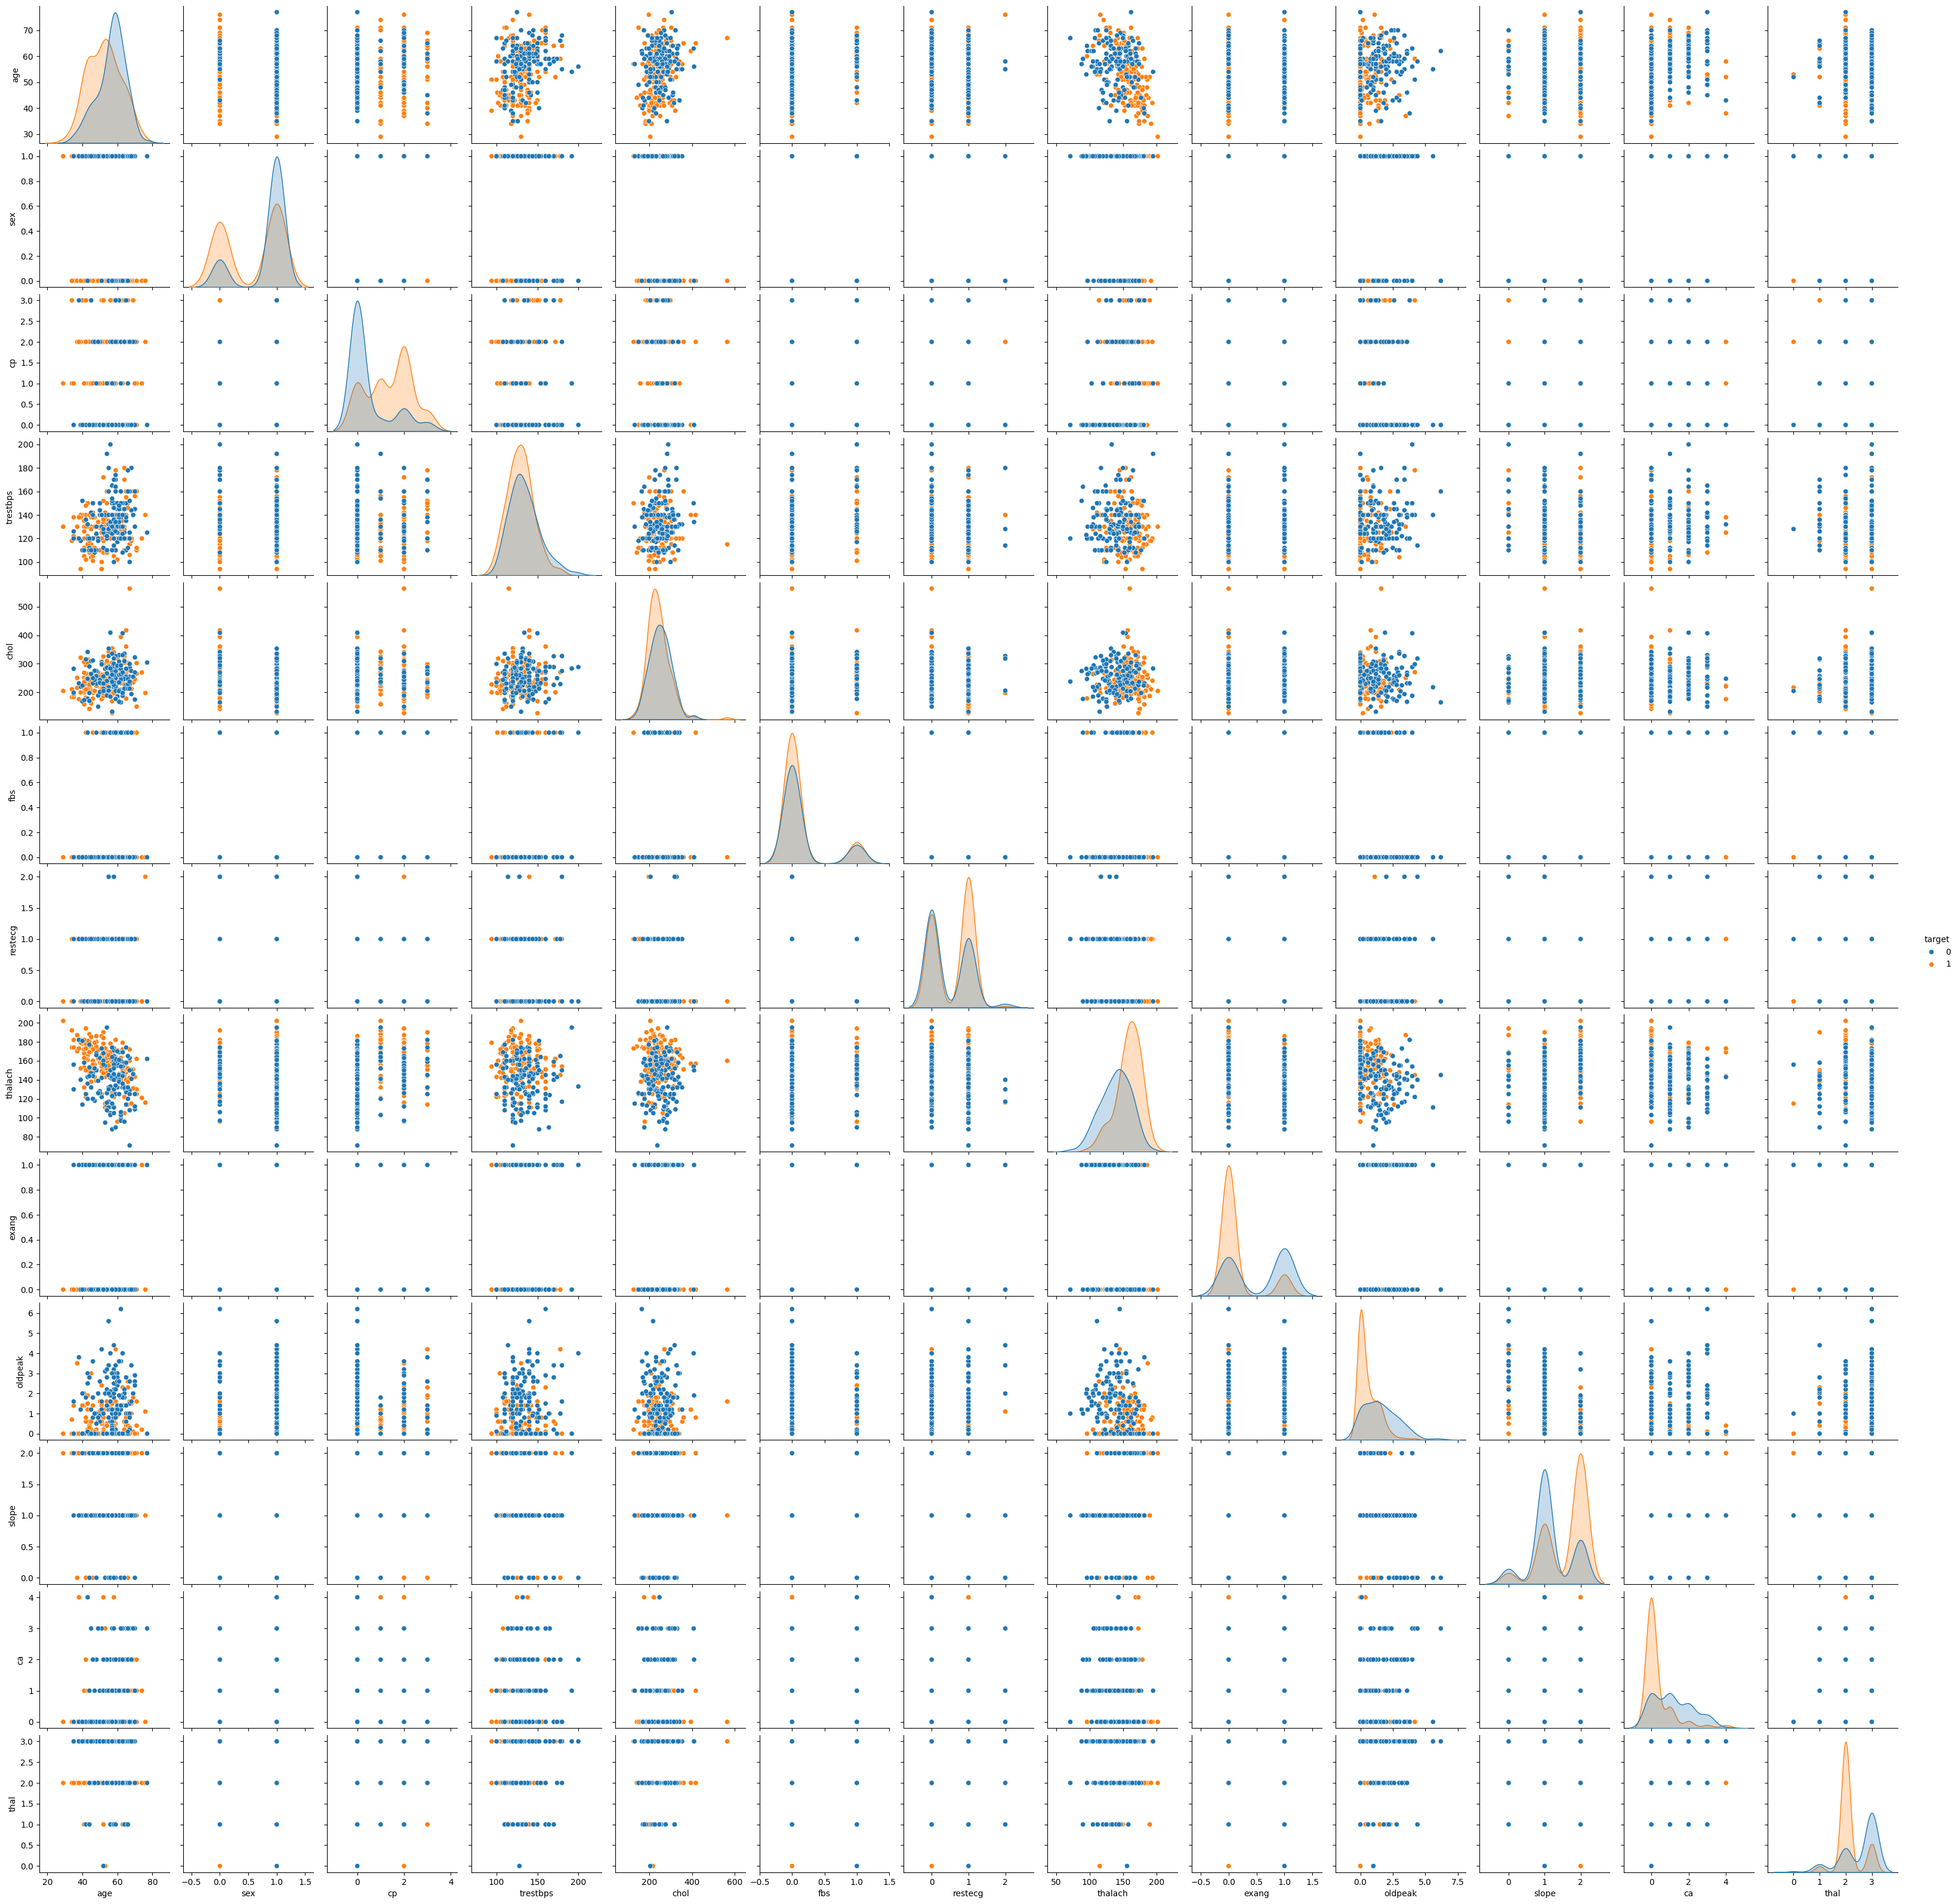

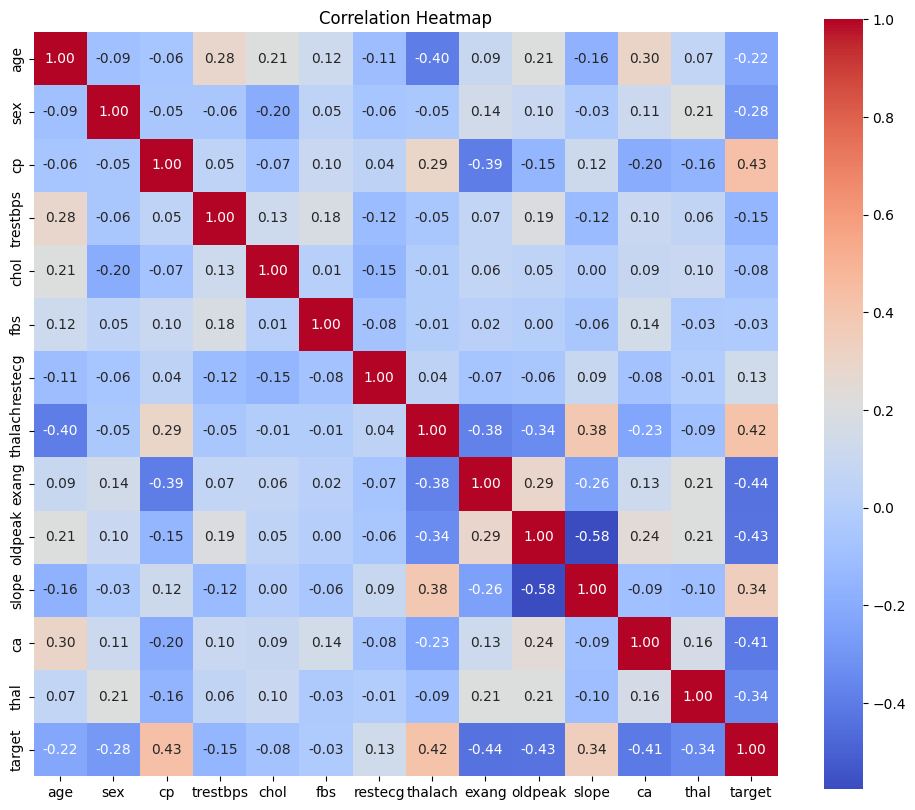

In [6]:
# BiVARIATE ANALYSIS against target variable
import seaborn as sns
# Pairplot for ALL variables against target variable
sns.pairplot(data, hue='target')
plt.show()
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show() 




In [7]:
from scipy.stats import chi2_contingency, f_oneway
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
continuous_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

target = "target"
df = data.copy()
# -----------------------------
# 2. Chi-Square test for categorical variables
# -----------------------------
chi2_results = {}
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[col] = p

chi2_summary = pd.DataFrame.from_dict(chi2_results, orient='index', columns=['P-value'])
chi2_summary['Significant'] = chi2_summary['P-value'] < 0.05

# -----------------------------
# 3. ANOVA (F-test) for continuous variables
# -----------------------------
anova_results = {}
for col in continuous_cols:
    group0 = df[df[target]==0][col]
    group1 = df[df[target]==1][col]
    f_stat, p_val = f_oneway(group0, group1)
    anova_results[col] = p_val

anova_summary = pd.DataFrame.from_dict(anova_results, orient='index', columns=['P-value'])
anova_summary['Significant'] = anova_summary['P-value'] < 0.05

# -----------------------------
# 4. Select significant variables for training
# -----------------------------
significant_categorical = chi2_summary[chi2_summary['Significant']].index.tolist()
significant_continuous = anova_summary[anova_summary['Significant']].index.tolist()

selected_features = significant_categorical + significant_continuous

print("✅ Significant Categorical Variables:", significant_categorical)
print("✅ Significant Continuous Variables:", significant_continuous)
print("🎯 Final Selected Features for Training:", selected_features)

✅ Significant Categorical Variables: ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']
✅ Significant Continuous Variables: ['age', 'trestbps', 'thalach', 'oldpeak']
🎯 Final Selected Features for Training: ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'thalach', 'oldpeak']


   sex  cp  restecg  exang  slope  ca  thal  age  trestbps  thalach  oldpeak  \
0    1   3        0      0      0   0     1   63       145      150      2.3   
1    1   2        1      0      0   0     2   37       130      187      3.5   
2    0   1        0      0      2   0     2   41       130      172      1.4   
3    1   1        1      0      2   0     2   56       120      178      0.8   
4    0   0        1      1      2   0     2   57       120      163      0.6   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
Accuracy: 0.819672131147541
Confusion Matrix:
 [[19  9]
 [ 2 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

Feature Importance:
 cp       

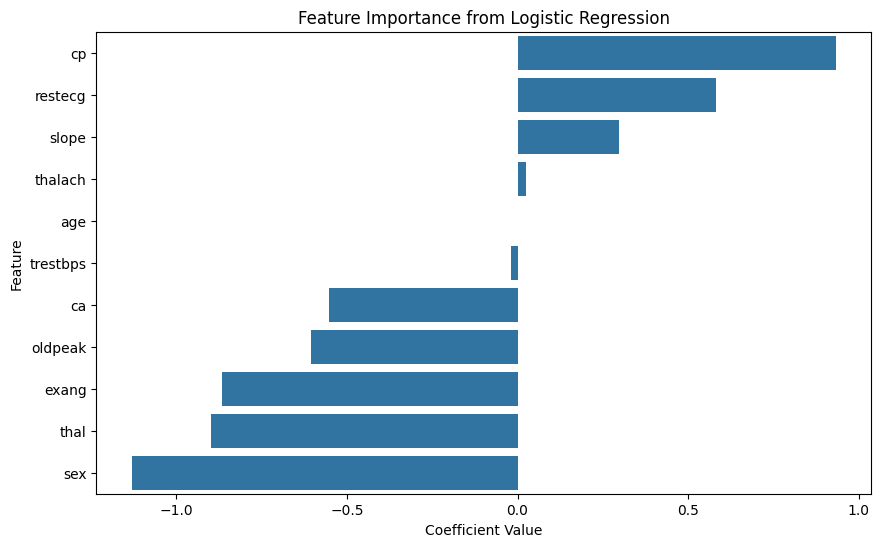

Accuracy with Top Features: 0.8032786885245902
Confusion Matrix with Top Features:
 [[21  7]
 [ 5 28]]
Classification Report with Top Features:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [8]:
# create a new dataframe with only the selected features and the target variable
final_df = df[selected_features + [target]]
print(final_df.head())
# make train test split
from sklearn.model_selection import train_test_split
X = final_df.drop(columns=[target])
y = final_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Apply logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Feature importance
importance = model.coef_[0]
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()
# Now use the most important features to train the model
top_features = feature_importance.head(8).index.tolist()
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]
model_top = LogisticRegression(max_iter=1000)
model_top.fit(X_train_top, y_train)
y_pred_top = model_top.predict(X_test_top)
print("Accuracy with Top Features:", accuracy_score(y_test, y_pred_top))
print("Confusion Matrix with Top Features:\n", confusion_matrix(y_test, y_pred_top))
print("Classification Report with Top Features:\n", classification_report(y_test, y_pred_top))



In [9]:
# lets use XGBoost
'''from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
# Feature importance from XGBoost
xgb_importance = xgb_model.feature_importances_
xgb_feature_importance = pd.Series(xgb_importance, index=X.columns).sort_values(ascending=False)
print("XGBoost Feature Importance:\n", xgb_feature_importance)
# Visualize feature importance from XGBoost
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_feature_importance.values, y=xgb_feature_importance.index)
plt.title('Feature Importance from XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()'''


'from xgboost import XGBClassifier\nxgb_model = XGBClassifier(use_label_encoder=False, eval_metric=\'logloss\')\nxgb_model.fit(X_train, y_train)\ny_pred_xgb = xgb_model.predict(X_test)\nprint("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))\nprint("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))\nprint("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))\n# Feature importance from XGBoost\nxgb_importance = xgb_model.feature_importances_\nxgb_feature_importance = pd.Series(xgb_importance, index=X.columns).sort_values(ascending=False)\nprint("XGBoost Feature Importance:\n", xgb_feature_importance)\n# Visualize feature importance from XGBoost\nplt.figure(figsize=(10, 6))\nsns.barplot(x=xgb_feature_importance.values, y=xgb_feature_importance.index)\nplt.title(\'Feature Importance from XGBoost\')\nplt.xlabel(\'Importance Score\')\nplt.ylabel(\'Feature\')\nplt.show()'